In [2]:
# set path

rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 

# import your own packages
from universal import *
plot_conf()

workdir = '/Users/rj/Fellow-CERN/SAD/ATF2/Wake/Exam/'
os.chdir(workdir)
import scipy;
from scipy.integrate import quad

In [3]:
# load Twiss parameters
dat0 = np.loadtxt('TwissParameter-10bx1by.dat', usecols = (1, 3, 6, 9, 11, 5, 8))
pos_n, bx_n, by_n, ex_n, ey_n, nx_n, ny_n= transpose(dat0)

dat0 = np.loadtxt('TwissParameter-25bx025by.dat', usecols = (1, 3, 6, 9, 11, 5, 8))
pos_u, bx_u, by_u, ex_u, ey_u, nx_u, ny_u= transpose(dat0)

# name, pos, subquence,  BX, AX, NX, BY, AY, NY, EX, EPX, EY, EPY, DX, DY = transpose(dat0)

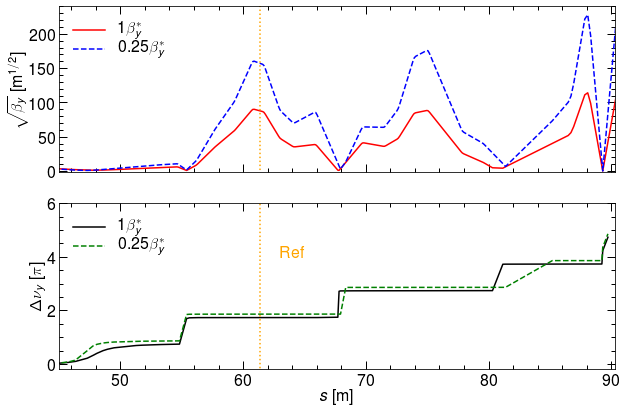

In [39]:
loc_REF3 = 61.39+zeros(100)
lin_REF3 = linspace(-10, 300, 100)

# plot by and ny
fig, axs = plt.subplots(2, 1, sharex = True, figsize = (9, 6))
fig.subplots_adjust(hspace=0)

axs[0].plot(pos_n[200:], sqrt(by_n[200:]), 'r-', markersize=3, label = r'1$\beta_y^*$')
axs[0].plot(pos_u[200:], sqrt(by_u[200:]), 'b--', label = r'0.25$\beta_y^*$')
axs[0].plot(loc_REF3, lin_REF3, ':', color = 'orange')
axs[0].set_xlim(45, 90.3)
axs[0].set_ylim(-2, 240)
# axs[0].set_yticks(np.arange(-3, 3.2))
axs[0].set_ylabel(r'$\sqrt{\beta_{y}}$ [m$^{1/2}$]', fontdict=font)
axs[0].legend(loc = 'best', frameon=False,)

axs[1].plot(pos_n[200:-10], ny_n[200:-10]/pi-ny_n[200]/pi, 'k-', markersize=3, label = r'1$\beta_y^*$')
axs[1].plot(pos_u[200:-10], ny_u[200:-10]/pi-ny_u[200]/pi, 'g--', label = r'0.25$\beta_y^*$')
axs[1].plot(loc_REF3, lin_REF3, ':', color = 'orange')

axs[1].set_xlabel(r'$s$ [m]', fontdict=font)
axs[1].set_ylabel(r'$\Delta\nu_y$ [$\pi$]', fontdict=font)
axs[1].legend(loc = 'best', frameon=False,)
axs[1].text(63, 4, r'Ref', fontdict=font, color='orange')
# axs[1].grid('r', linestyle=':', lw=1)
axs[1].set_ylim(-0.2, 6)

fig.tight_layout()
plt.show()
fig.savefig('Bety_ny_1by_025by.eps')
fig.savefig('Bety_ny_1by_025by.pdf')

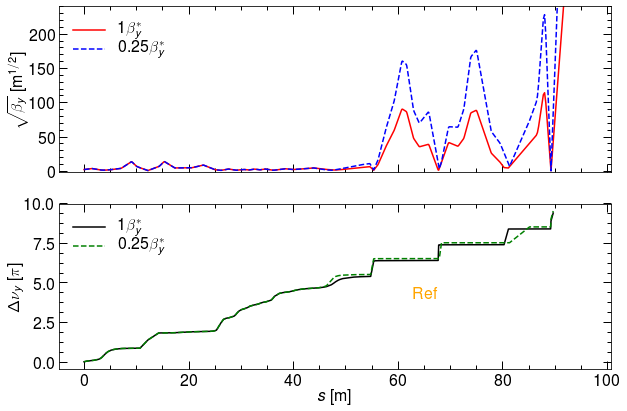

In [6]:
# plot by and ny
fig, axs = plt.subplots(2, 1, sharex = True, figsize = (9, 6))
fig.subplots_adjust(hspace=0)

axs[0].plot(pos_n[0:], sqrt(by_n[0:]), 'r-', markersize=3, label = r'1$\beta_y^*$')
axs[0].plot(pos_u[0:], sqrt(by_u[0:]), 'b--', label = r'0.25$\beta_y^*$')
# axs[0].plot(loc_REF3, lin_REF3, ':', color = 'orange')
# axs[0].set_xlim(45, 90.3)
axs[0].set_ylim(-2, 240)
# axs[0].set_yticks(np.arange(-3, 3.2))
axs[0].set_ylabel(r'$\sqrt{\beta_{y}}$ [m$^{1/2}$]', fontdict=font)
axs[0].legend(loc = 'best', frameon=False,)

axs[1].plot(pos_n[0:-10], ny_n[0:-10]/pi-ny_n[0]/pi, 'k-', markersize=3, label = r'1$\beta_y^*$')
axs[1].plot(pos_u[0:-10], ny_u[0:-10]/pi-ny_u[0]/pi, 'g--', label = r'0.25$\beta_y^*$')
# axs[1].plot(loc_REF3, lin_REF3, ':', color = 'orange')

axs[1].set_xlabel(r'$s$ [m]', fontdict=font)
axs[1].set_ylabel(r'$\Delta\nu_y$ [$\pi$]', fontdict=font)
axs[1].legend(loc = 'best', frameon=False,)
axs[1].text(63, 4, r'Ref', fontdict=font, color='orange')
# axs[1].grid('r', linestyle=':', lw=1)
# axs[1].set_ylim(-0.2, 6)

fig.tight_layout()
plt.show()

In [36]:
# phase advance betwee REF and IP
print("Phase advance between REF and IP: %.3f (1by)"%(ny_n[365]-ny_n[253]))
print("Phase advance between REF and IP: %.3f (0.25by)"%(ny_u[365]-ny_u[253]))

print("$by_Ref$ = %.3f (1by)"%by_n[253])
print("$by_Ref$ = %.3f (0.25by)"%by_u[253])

Phase advance between REF and IP: 7.855 (1by)
Phase advance between REF and IP: 7.854 (0.25by)
$by_Ref$ = 7672.557 (1by)
$by_Ref$ = 24593.375 (0.25by)


In [37]:
sqrt(by_u[253]*by_u[365])/sqrt(by_n[253]*by_n[365])

0.8951843843704591

In [45]:
dat0 = loadtxt('wake_ref_rough.dat')
z_ref, w_ref= transpose(dat0)

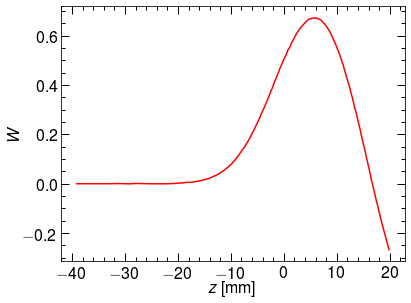

In [47]:
fig = plt.figure()
plt.plot(z_ref*1e3, w_ref)
plt.xlabel(r'$z$ [mm]')
plt.ylabel(r'$W$')

fig.tight_layout()
plt.show()

In [78]:
dat0 = loadtxt('data/part_IP_10bx1by_wo_wake.dat')
dat1 = loadtxt('data/part_IP_10bx1by_w_wake.dat')

x_0, xx_0, y_0, yy_0, z_0, dp_0, flag_0 = transpose(dat0)
x_1, xx_1, y_1, yy_1, z_1, dp_1, flag_1 = transpose(dat1)

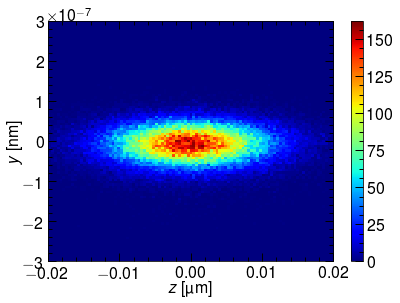

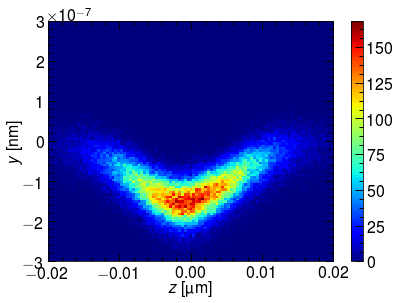

In [79]:
xedges = np.linspace(-20e-3, 20e-3, 100)
yedges = np.linspace(-3e-7, 3e-7, 100)

H, xedges, yedges = np.histogram2d(z_0, y_0, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.

fig = plt.figure()
# ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(H, cmap = 'jet', interpolation='nearest', origin='low', aspect= 'auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel(r'$z$ [$\si{\um}$]')
plt.ylabel(r"$y$ [nm]")
plt.colorbar()
           
fig.tight_layout()
plt.show()

H, xedges, yedges = np.histogram2d(z_1, y_1, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.

fig = plt.figure()
# ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(H, cmap = 'jet', interpolation='nearest', origin='low', aspect= 'auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel(r'$z$ [$\si{\um}$]')
plt.ylabel(r"$y$ [nm]")
plt.colorbar()
           
fig.tight_layout()
plt.show()

# fig.savefig('Dis_phasesp_longi.pdf')

In [104]:
dat0 = loadtxt('apt.dat', usecols = (1, 2, 3))
s_ele, ax_ele, ay_ele = transpose(dat0)

In [152]:
# remover zero values
apertInfo = [[0, 0, 0]]
for i in range(len(s_ele)):
    if ax_ele[i]*ay_ele[i]!=0:
        apertInfo = np.append(apertInfo, [[s_ele[i], ax_ele[i], ay_ele[i]]], axis=0)
        
# 
i = 1
apertInfo2 = [[0, 0, 0]]
while i < len(apertInfo):
    apertInfo2[0] = apertInfo[1]
    for j in range(100): 
        if i+j<len(apertInfo):
            if apertInfo[i, 1]!=apertInfo[i+j, 1] or apertInfo[i, 2]!=apertInfo[i+j, 2]:
                apertInfo2 = np.append(apertInfo2, [[apertInfo[i+j, 0], apertInfo[i,1], apertInfo[i,2]]], axis=0)
                apertInfo2 = np.append(apertInfo2, [apertInfo[i+j]], axis=0)
                i = i+j
                break   
        else:
            break
    if i+j>=len(apertInfo):
        break

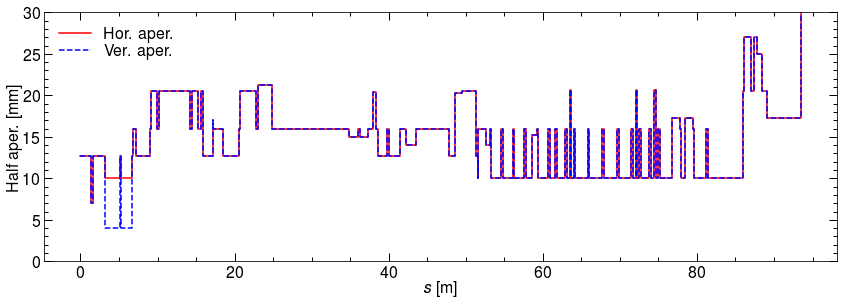

In [163]:
fig = plt.figure(figsize=(12, 4.5))
plt.plot(apertInfo2[:,0], apertInfo2[:,1]*1e3, label = 'Hor. aper.')
plt.plot(apertInfo2[:,0], apertInfo2[:,2]*1e3, label = 'Ver. aper.')
plt.xlabel(r'$s$ [m]')
plt.ylabel(r'Half aper. [mm]')
plt.ylim(0, 30)
plt.legend(loc = 'best', frameon = False)

fig.tight_layout()
plt.show()

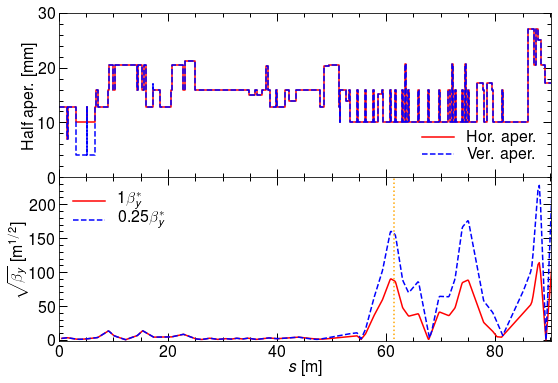

In [167]:
fig, axs = plt.subplots(2, 1, sharex = True, figsize = (9, 6))
fig.subplots_adjust(hspace=0)

axs[0].plot(apertInfo2[:,0], apertInfo2[:,1]*1e3, label = 'Hor. aper.')
axs[0].plot(apertInfo2[:,0], apertInfo2[:,2]*1e3, label = 'Ver. aper.')
axs[0].set_ylabel(r'Half aper. [mm]')
axs[0].set_ylim(0, 30)
axs[0].legend(loc = 'best', frameon = False)

axs[1].plot(pos_n[2:], sqrt(by_n[2:]), 'r-', markersize=3, label = r'1$\beta_y^*$')
axs[1].plot(pos_u[2:], sqrt(by_u[2:]), 'b--', label = r'0.25$\beta_y^*$')
axs[1].plot(loc_REF3, lin_REF3, ':', color = 'orange')
axs[1].set_xlim(0., 90.3)
axs[1].set_ylim(-2, 240)
# axs[0].set_yticks(np.arange(-3, 3.2))
axs[1].set_xlabel(r'$s$ [m]')
axs[1].set_ylabel(r'$\sqrt{\beta_{y}}$ [m$^{1/2}$]', fontdict=font)
axs[1].legend(loc = 'best', frameon=False,)

# fig.tight_layout()
plt.show()